## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Загружаем исходные данные

In [14]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [66]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
#train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
#test_img = np.resize(test, (test.shape[0], 28, 28))
train_img = train[:, 1:]
test_img = test

In [67]:
train_img.shape

(42000, 784)

In [68]:
test_img.shape

(28000, 784)

## Визуализируем исходные данные

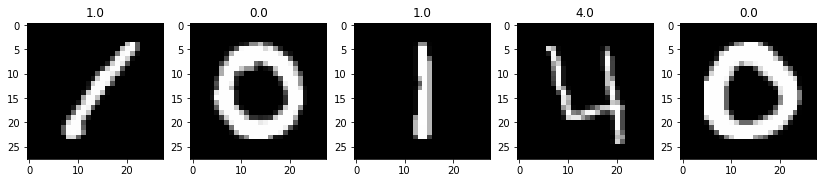

In [76]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img.reshape(28, 28), cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

Text(0, 0.5, 'explained_variance_ratio_')

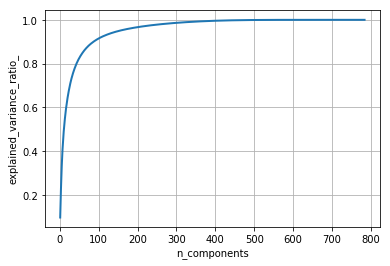

In [89]:
pca_test = PCA().fit(train_img)

cum_evr = np.cumsum(pca_test.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [177]:
pca = PCA(n_components=250).fit(train_img)

In [178]:
pca.explained_variance_ratio_.sum()

0.9778729571543932

In [ ]:
#200 фичей описывают 97% изображения

In [179]:
trainData = pca.fit_transform(train_img)

In [180]:
trainData.shape

(42000, 250)

## Нормируем

In [181]:
# По умолчанию используется L2 норма
trainDataNorm = trainData / np.linalg.norm(trainData, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [182]:
y_train, y_val, x_train, x_val = train_test_split(
    train_label, trainDataNorm, test_size=0.2,
    random_state=42)

In [183]:
clf = LogisticRegression(C=0.1)

In [184]:
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
y_val_pred = clf.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [186]:
print('Accuracy: %s' % accuracy_score(y_val, y_val_pred))

Accuracy: 0.8841666666666667


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       816
         1.0       0.81      0.95      0.88       909
         2.0       0.83      0.79      0.81       846
         3.0       0.76      0.78      0.77       937
         4.0       0.79      0.82      0.80       839
         5.0       0.73      0.68      0.70       702
         6.0       0.86      0.85      0.86       785
         7.0       0.90      0.84      0.87       893
         8.0       0.82      0.75      0.78       835
         9.0       0.76      0.75      0.75       838

   micro avg       0.82      0.82      0.82      8400
   macro avg       0.81      0.81      0.81      8400
weighted avg       0.82      0.82      0.81      8400



In [188]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[742   0   2   0   2  37  25   0   8   0]
 [  0 866  17   0   0  11   2   0  13   0]
 [ 13  33 665  25  34   3  28  14  29   2]
 [  8  16  31 731   2  57   6  13  49  24]
 [  2  12   8   0 692   5  19   5  10  86]
 [ 14  34   8  96  26 476  21   4  10  13]
 [ 20  20  33   1  16  23 671   0   1   0]
 [  2  41  15   2  16   9   0 753   5  50]
 [  8  31  10  89  12  23   8   4 624  26]
 [ 16  17  13  16  81  10   1  48   8 628]]


## Предсказания на тестовыйх данных

In [189]:
testData = pca.fit_transform(test_img)
testDataNorm = testData / np.linalg.norm(testData, axis=1)[:, None]

In [190]:
testDataNorm.shape

(28000, 250)

In [191]:
pred_test = clf.predict(testDataNorm)

## Визуализируем предсказания

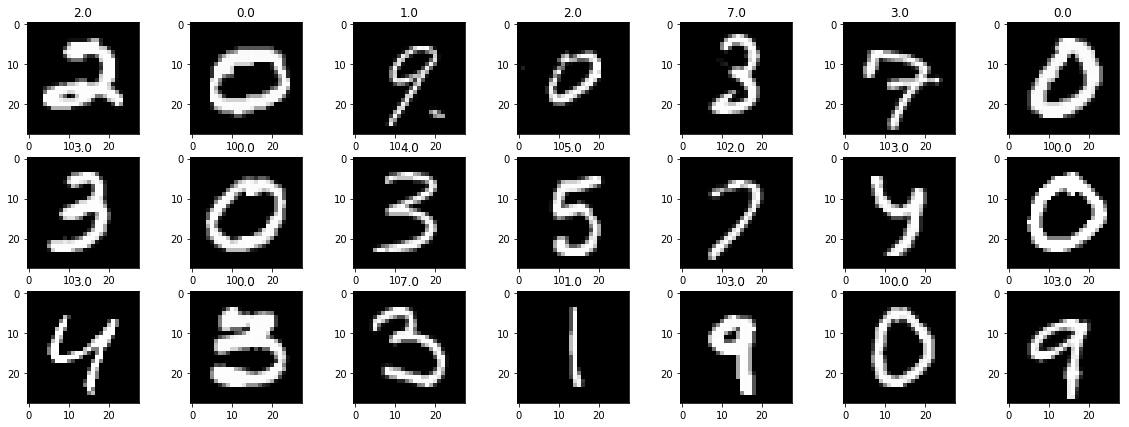

In [192]:
fig = plt.figure(figsize=(20, 7))
for i, img in enumerate(test_img[:21], 1):
    subplot = fig.add_subplot(3, 7, i)
    plt.imshow(img.reshape(28, 28), cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [194]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [136]:
!head submit.txt

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [270]:
# Your submission scored 0.41700